In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import seaborn as sns
from scipy import linalg
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

In [2]:
gene_rpkm=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

FileNotFoundError: [Errno 2] File b'/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv' does not exist: b'/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv'

In [4]:
gene_rpkm=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

(1680, 24057)

In [5]:
gene_rpkm.head()

,0,1,2,3,4,5,6,7,8,9,...,24047,24048,24049,24050,24051,24052,24053,24054,24055,24056
Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101401,0,76.13,0.05,0,0,0,0,0,0,0.09,...,0,0,0,0,0,0,0,1401.76,242.94,242.94
A01101402,0,512.73,10.11,0,0,146.61,0,0,0,0,...,0,0,0,0,0,0,0,1397.16,539.54,539.54
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101404,0,170.56,0.02,0,0,117.6,0,0,0,125.81,...,0,0,0,0,0,0,0,1442.66,260.02,260.02


In [6]:
new_header = gene_rpkm.iloc[0]
gene_rpkm = gene_rpkm[1:]
gene_rpkm.columns = new_header
gene_rpkm

Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101401,0,76.13,0.05,0,0,0,0,0,0,0.09,...,0,0,0,0,0,0,0,1401.76,242.94,242.94
A01101402,0,512.73,10.11,0,0,146.61,0,0,0,0,...,0,0,0,0,0,0,0,1397.16,539.54,539.54
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101404,0,170.56,0.02,0,0,117.6,0,0,0,125.81,...,0,0,0,0,0,0,0,1442.66,260.02,260.02
A01101405,0,113.87,0.04,0,0,180.93,0,0,0,0.1,...,0,0,0,0,0,0,0,749.68,348.1,348.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z11041427,0,106.52,0,0,0.08,221.36,0,0,0,141.14,...,0,0,0,0,0,0,0,1514.75,433.01,433.01
Z11041428,0,349.73,0,0,0,262.66,88.02,0,0,0,...,0,0,0,0,0,0,0,1949.32,787.32,787.32
Z11041429,0,1.54,1.17,0,0,219.92,0,0,0,94.38,...,0,0,0,0,0,0,0,1829.42,506.35,506.35
Z11041430,0,0.54,7.65,0,43.42,272.64,0,0,0,78.25,...,0,0,0,0,0,0,0,1275.09,709.91,709.91


In [7]:
cellmeta=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\cell_metadata.csv")
cellmeta.shape

(1679, 16)

In [5]:
cellmeta=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/cell_metadata.csv")
cellmeta.shape

(1679, 16)

In [48]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']
Excitatory_cells=excitatory_meta['long_name']
Excitatory_cells


,long_name,cre,collection_date,sequencing_type,total_reads,all_mapped_percent,mRNA_percent,genome_percent,ercc_percent,tdt_permillion,major_class,sub_class,major_dissection,layer_dissectoin,color_code,short_name
2,A01101403,Calb2,11/18/2013,hiseq,5864322,90.55,48.30,34.01,4.12,106.2,Excitatory,L4,V1,All,11,A202_V
5,A01101406,Calb2,11/18/2013,hiseq,24171169,92.18,49.31,35.85,3.14,205.8,Excitatory,L2/3,V1,All,11,A205_V
6,A01101407,Calb2,11/18/2013,hiseq,22447919,93.19,48.83,37.06,3.12,204.5,Excitatory,L2/3,V1,All,11,A206_V
7,A01101408,Calb2,11/18/2013,hiseq,20995719,93.10,67.24,18.11,2.27,302.3,Excitatory,L2/3,V1,All,11,A207_V
8,A02271433,Calb2,2/25/2014,hiseq,9023705,93.01,47.38,34.82,3.22,318.4,Excitatory,L4,V1,All,11,A272_V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,U11051420,Nos1,10/16/2014,hiseq_121514,9082806,92.44,56.83,30.48,0.48,85.8,Excitatory,L6b,V1,All,24,U1479_V
1472,U11051422,Nos1,10/16/2014,hiseq_121514,10279727,92.35,56.76,29.96,0.47,273.7,Excitatory,L5a,V1,All,24,U1481_V
1480,U11051430,Nos1,10/16/2014,hiseq_121514,11872792,92.72,54.55,32.89,0.66,176.5,Excitatory,L4,V1,All,24,U1489_V
1482,U11051432,Nos1,10/16/2014,hiseq_121514,22763402,92.46,45.52,41.74,0.45,197.5,Excitatory,L2/3,V1,All,24,U1491_V


In [9]:
excitatory_gene_rpkm=gene_rpkm.loc[Excitatory_cells]
excitatory_gene_rpkm.head()
avg=excitatory_gene_rpkm.mean()
minimum=excitatory_gene_rpkm.min()
maximum=excitatory_gene_rpkm.max()

print(minimum.min())
print(maximum.max())
print(avg.mean())

0.0
25780.07
19.742181147486356


In [10]:
#excitatory_gene_rpkm
#excitatory_gene_rpkm = excitatory_gene_rpkm.loc[:, (excitatory_gene_rpkm != 0).any(axis=0)]

#excitatory_gene_rpkm

In [11]:
excitatory_gene_rpkm = excitatory_gene_rpkm.apply(pd.to_numeric)
excitatory_gene_rpkm.dtypes

Unnamed: 0
0610005C13Rik    float64
0610007C21Rik    float64
0610007L01Rik    float64
0610007N19Rik    float64
0610007P08Rik    float64
                  ...   
mt_FR668231      float64
mt_FW313083      float64
mt_GU332589      float64
mt_X57779        float64
mt_X57780        float64
Length: 24057, dtype: object

In [12]:
excitatory_gene_rpkm_matrix = excitatory_gene_rpkm.to_numpy()
excitatory_gene_rpkm_matrix

array([[0.00000e+00, 1.72750e+02, 0.00000e+00, ..., 3.32880e+02,
        3.41450e+02, 3.41450e+02],
       [0.00000e+00, 1.09000e+01, 6.00000e-02, ..., 7.29640e+02,
        4.58860e+02, 4.58860e+02],
       [0.00000e+00, 1.91230e+02, 7.01900e+01, ..., 7.46420e+02,
        3.36740e+02, 3.36740e+02],
       ...,
       [0.00000e+00, 9.92700e+01, 0.00000e+00, ..., 1.45625e+03,
        4.00310e+02, 4.00310e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.42730e+02,
        7.43950e+02, 7.43950e+02],
       [0.00000e+00, 1.70000e-01, 2.40000e-01, ..., 1.44744e+03,
        5.76540e+02, 5.76540e+02]])

In [13]:
excitatory_gene_rpkm_matrix.shape

(756, 24057)

In [14]:
excitatory_gene_rpkm_matrix.dtype
excitatory_gene_rpkm_matrix = np.transpose(excitatory_gene_rpkm_matrix)
excitatory_gene_rpkm_matrix.shape

(24057, 756)

In [15]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

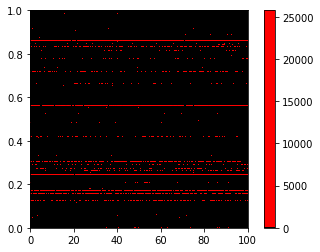

In [16]:
img = plt.imshow(excitatory_gene_rpkm_matrix, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [17]:
#SVD
U, s, vT = svd(excitatory_gene_rpkm_matrix)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

rank = excitatory_gene_rpkm_matrix.shape[1] - count
rank

756

In [18]:
U.shape

(24057, 24057)

In [19]:
test = U.dot(np.transpose(U))

identity_matrix = np.identity(len(U[:,1]))

np.allclose(test, identity_matrix, atol=1e-8)

True

In [20]:
vT.shape

(756, 756)

In [21]:
test = vT.dot(np.transpose(vT))

identity_matrix = np.identity(len(vT[:,1]))

np.allclose(test, identity_matrix, atol=1e-08)

True

In [22]:
U, s, VT = svd(excitatory_gene_rpkm_matrix)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = VT[:rank, :]

In [23]:
U.shape

(24057, 756)

In [24]:
sigma.shape

(756, 756)

In [25]:
VT.shape

(756, 756)

In [26]:
uDotS = U.dot(sigma)
uDotSDotVt = uDotS.dot(VT)

testSVD = np.round(abs(excitatory_gene_rpkm_matrix - uDotSDotVt))
testSVD = np.matrix(testSVD)
if (testSVD.all() == 0):
    zero = True
zero

True

In [27]:
print(np.max(U))
print(np.min(U))
print(np.mean(U))

0.6774324749112034
-0.650953431343867
-6.191130805003647e-06


In [28]:
gBR = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
gBRmap = LinearSegmentedColormap.from_list("mycmap", gBR)

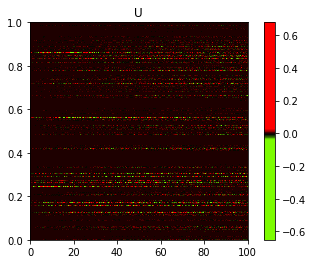

In [29]:
img = plt.imshow(U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [34]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

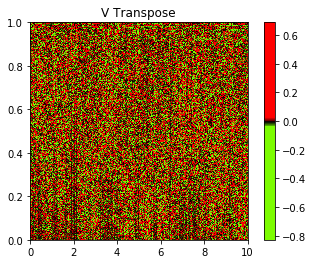

In [37]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [36]:
print(np.min(VT))
print(np.max(VT))
print(np.mean(VT))

-0.8280847513185551
0.688267467153394
-4.2092950320594986e-05


In [30]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

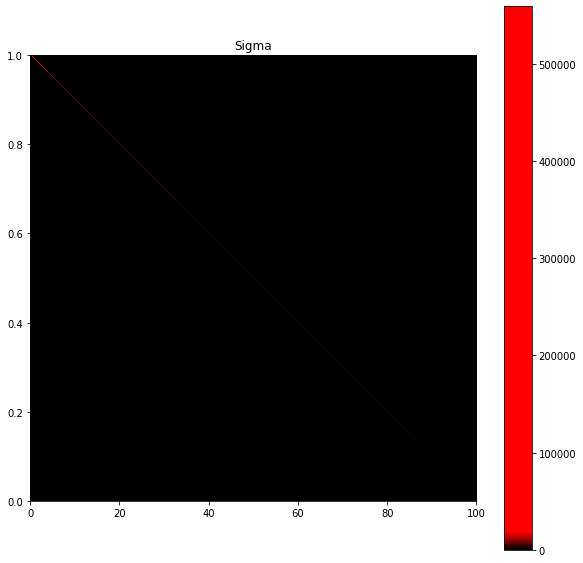

In [31]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [51]:
print(np.min(sigma))
print(np.max(sigma))
print(np.mean(sigma))

0.0
559035.9163465025
7.275626366396765


In [33]:
diagonal = diag(sigma)

sort_diag = np.sort(diagonal)
sort_diag=sort_diag[::-1]

np.allclose(sort_diag, diagonal)

True

In [84]:
d_sig=diag(sigma)

count = 0
for m in range(len(d_sig)):
    if d_sig[m] < 7000:
        count = m
        break
        
sig=d_sig[:count]
denoise_sigma=np.diag(sig)
len(denoise_sigma)

88

In [90]:
dns_U=U[:,:len(denoise_sigma)]
dns_VT=VT[:len(denoise_sigma),:]


In [91]:
dns_uDotS = dns_U.dot(denoise_sigma)
dns_uDotSDotVt = dns_uDotS.dot(dns_VT)


In [103]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

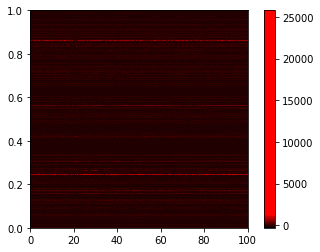

In [104]:
img = plt.imshow(dns_uDotSDotVt, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

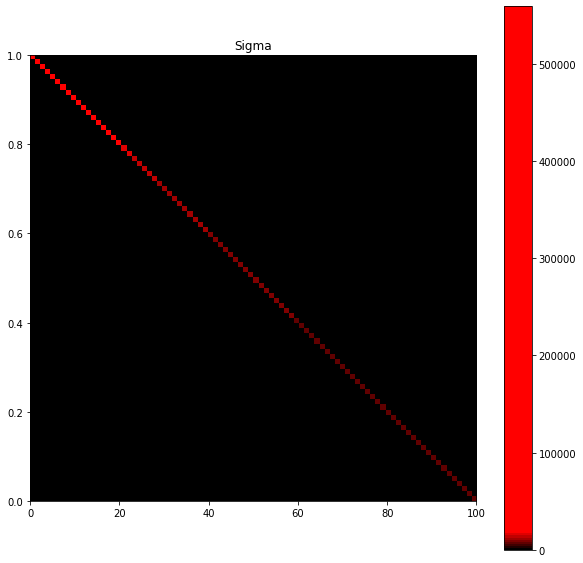

In [105]:
plt.figure(figsize=(10,10))
img = plt.imshow(denoise_sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [123]:
gBR3 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap3 = LinearSegmentedColormap.from_list("mycmap", gBR3)

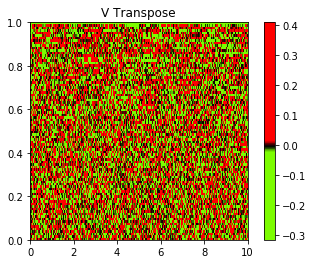

In [124]:
img = plt.imshow(dns_VT, cmap=gBRmap3, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap3)

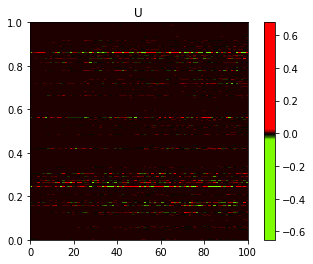

In [107]:
img = plt.imshow(dns_U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [49]:
L1_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L1']
L1_cells=L1_meta['long_name']
print(L1_cells.shape)

L23_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L2/3']
L23_cells=L23_meta['long_name']
print(L23_cells.shape)

L4_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L4']
L4_cells=L4_meta['long_name']
print(L4_cells.shape)

L5_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L5']
L5_cells=L5_meta['long_name']
print(L5_cells.shape)

L6_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L6']
L6_cells=L6_meta['long_name']
print(L6_cells.shape)

All_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='All']
All_cells=All_meta['long_name']
print(All_cells.shape)

upper_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='upper']
upper_cells=upper_meta['long_name']
print(upper_cells.shape)

lower_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='lower']
lower_cells=lower_meta['long_name']
print(lower_cells.shape)

(7,)
(48,)
(202,)
(116,)
(12,)
(232,)
(7,)
(12,)


In [ ]:
excitatory_gene_rpkm=gene_rpkm.loc[Excitatory_cells]
excitatory_gene_rpkm.head()
avg=excitatory_gene_rpkm.mean()
minimum=excitatory_gene_rpkm.min()
maximum=excitatory_gene_rpkm.max()

print(minimum.min())
print(maximum.max())
print(avg.mean())